In [35]:
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
with open("data/id_to_recipe.json") as f:
    data = json.load(f)


corpus = []
for id, recipe in data.items():
    text = (
        " ".join(recipe["ingredients"])
        + " "
        + recipe["description"]
        + " "
        + recipe["instructions"]
    )
    corpus.append(text)

vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(corpus)

In [96]:
n_components = 150
svd_model = TruncatedSVD(n_components=n_components)
svd = svd_model.fit_transform(tfidf_matrix)

In [90]:
def sim_scores(query):
    query_vec = vectorizer.transform([query])
    query_svd = svd_model.transform(query_vec)

    sim_scores = cosine_similarity(query_svd, svd)

    ids = list(data.keys())

    results = [(ids[i], sim_scores[0][i]) for i in range(len(sim_scores[0]))]
    return results

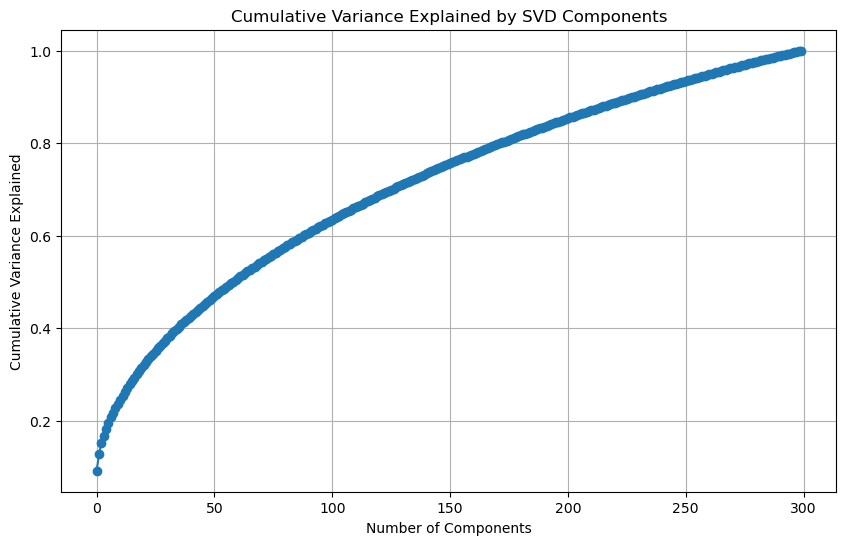

In [97]:
import matplotlib.pyplot as plt

# Perform SVD with a high number of components
svd = TruncatedSVD(n_components=300)
U = svd.fit_transform(tfidf_matrix)
singular_values = svd.singular_values_

# Calculate the cumulative variance explained
total_variance = np.sum(singular_values**2)
cumulative_variance_explained = np.cumsum(singular_values**2) / total_variance

# Plot the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by SVD Components')
plt.grid(True)
plt.show()
